In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense


In [30]:
# Load dataset
#iris = datasets.load_iris()
iris = datasets.load_breast_cancer()
X = iris.data
y = iris.target.reshape(-1, 1)

# Preprocess dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
# Prepare targets for NN
encoder = OneHotEncoder().fit(y_train)
y_train_encoded = encoder.transform(y_train).toarray()
y_test_encoded = encoder.transform(y_test).toarray()


In [37]:
# Define Neural Network
model = Sequential()
model.add(Dense(10, input_dim=30, activation='relu'))
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Neural Network
model.fit(X_train, y_train_encoded, epochs=100, verbose=0)
predictions_nn = model.predict(X_test).argmax(axis=-1)


4/4 [==============================] - 0s 584us/step


In [38]:
# Define and train Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train.ravel())
predictions_rf = clf_rf.predict(X_test)


In [39]:
# Define and train XGBoost
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf_xgb.fit(X_train, y_train.ravel())
predictions_xgb = clf_xgb.predict(X_test)


/opt/homebrew/Caskroom/miniconda/base/envs/LanguageDetection/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [40]:
# Compare their accuracy
accuracy_nn = accuracy_score(y_test, predictions_nn)
accuracy_rf = accuracy_score(y_test, predictions_rf)
accuracy_xgb = accuracy_score(y_test, predictions_xgb)

print(f"Neural Network Accuracy: {accuracy_nn}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"XGBoost Accuracy: {accuracy_xgb}")


Neural Network Accuracy: 0.9736842105263158
Random Forest Accuracy: 0.9649122807017544
XGBoost Accuracy: 0.956140350877193


In [41]:
# inspecting the dataset:
for i in range(3):
    print(X_train[i])
    print(y_train[i])

[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
  2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
 -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
  2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
  0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]
[1]
[ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
  2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
  0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
 -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
  0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]
[0]
[-1.39998202 -1.24962228 -1.34520926 -1.10978518 -1.33264483 -0.30735463
 -0.36555756 -0.69650228  1.93033305  0.95437877  0.02752055  1.96305996
 -0.12095781 -0.35077918  0.57276579  0.7394992   0.32065553  0.58946222
  2.61504052  0.71892779 -1.29528358 -1.04

In [42]:
print(len(X_train))
print(len(X_test))

455
114


# Regression problem

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
import time

In [103]:

# Load dataset
cali = datasets.fetch_california_housing()
X = cali.data
y = cali.target.reshape(-1, 1)

# Preprocess dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:

# Define Neural Network
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(1)) # Regression problem, single output
model.compile(loss='mean_squared_error', optimizer='adam')

In [99]:

# Train Neural Network
model.fit(X_train, y_train, epochs=20, verbose=0)

In [100]:

# Define and train Random Forest
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

In [146]:

# Define and train XGBoost
reg_xgb = XGBRegressor(objective ='reg:squarederror', n_estimators=500, max_depth=3, learning_rate=0.8, alpha=0.5, gamma=0.5)
reg_xgb.fit(X_train, y_train.ravel())

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.8, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [148]:

# Measure inference time for Neural Network
start_time = time.time()
predictions_nn = model.predict(X_test)
nn_inference_time = time.time() - start_time

# Measure inference time for Random Forest
start_time = time.time()
predictions_rf = reg_rf.predict(X_test)
rf_inference_time = time.time() - start_time

# Measure inference time for XGBoost
start_time = time.time()
predictions_xgb = reg_xgb.predict(X_test)
xgb_inference_time = time.time() - start_time

# Compare their MSE
mse_nn = mean_squared_error(y_test, predictions_nn)
mse_rf = mean_squared_error(y_test, predictions_rf)
mse_xgb = mean_squared_error(y_test, predictions_xgb)

print(f"Neural Network MSE: {mse_nn}, Inference Time: {nn_inference_time} seconds")
print(f"Random Forest MSE: {mse_rf}, Inference Time: {rf_inference_time} seconds")
print(f"XGBoost MSE: {mse_xgb}, Inference Time: {xgb_inference_time} seconds")


"""
Neural Network MSE: 0.27949198367307443, Inference Time: 0.07219791412353516 seconds
Random Forest MSE: 0.2555701270235777, Inference Time: 0.07853388786315918 seconds
XGBoost MSE: 0.24856349594330063, Inference Time: 0.003816366195678711 seconds
"""


129/129 [==============================] - 0s 332us/step
Neural Network MSE: 0.27949198367307443, Inference Time: 0.07652091979980469 seconds
Random Forest MSE: 0.2555701270235777, Inference Time: 0.08017683029174805 seconds
XGBoost MSE: 0.23498466166912613, Inference Time: 0.0020227432250976562 seconds


'\nNeural Network MSE: 0.27949198367307443, Inference Time: 0.07219791412353516 seconds\nRandom Forest MSE: 0.2555701270235777, Inference Time: 0.07853388786315918 seconds\nXGBoost MSE: 0.24856349594330063, Inference Time: 0.003816366195678711 seconds\n'

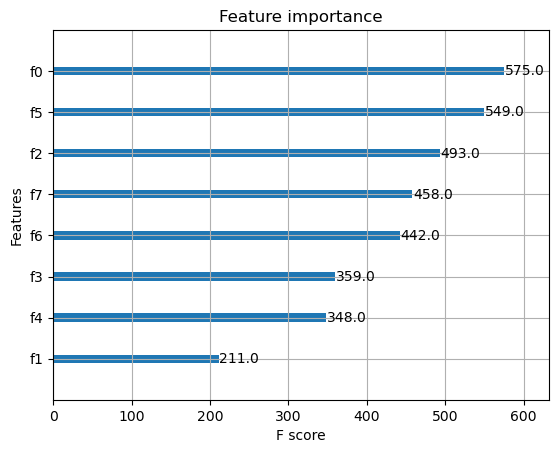

In [105]:
# TODO: do interpretability
from xgboost import plot_importance
import matplotlib.pyplot as plt
# Plot feature importance
plot_importance(reg_xgb)
plt.show()



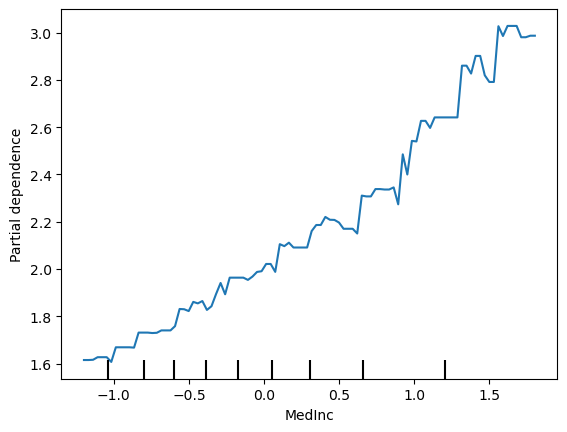

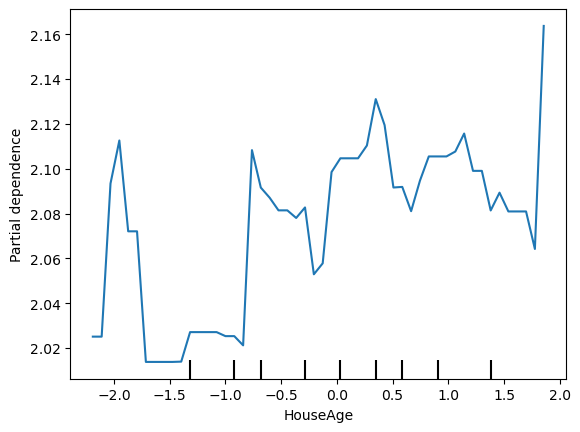

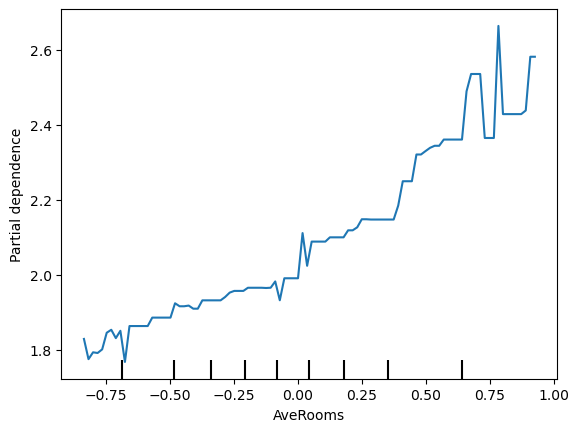

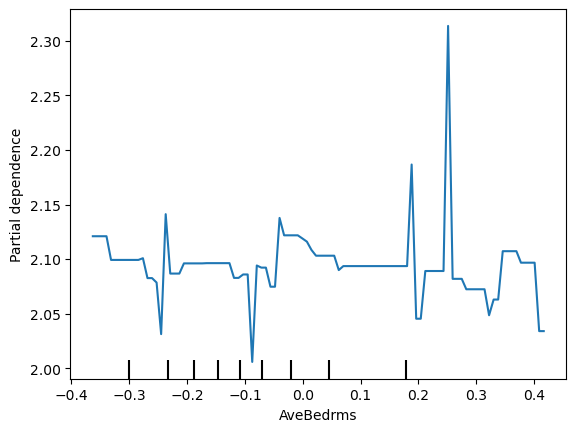

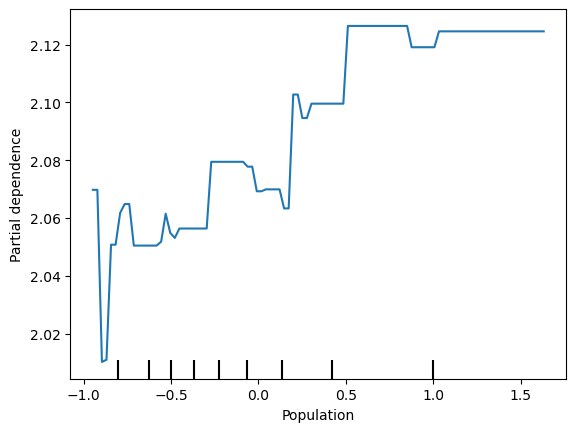

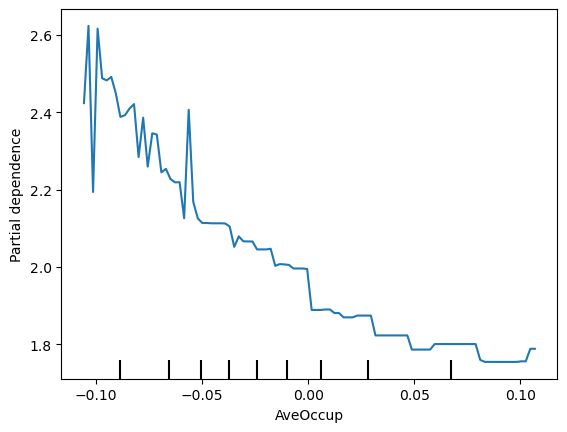

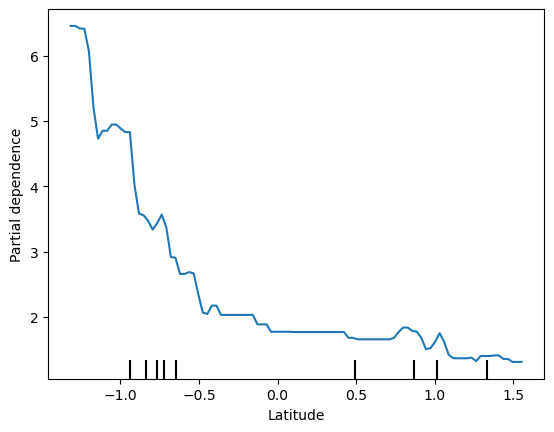

In [147]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'cali' is the dataset you're using
feature_names = cali.feature_names

# Feature of interest for PDP plot
# In this case, we'll assume you want the second feature
feature_of_interest = 3  # 0-based index
for feature_of_interest in range(7):
    PartialDependenceDisplay.from_estimator(reg_xgb, X_train, features=[feature_of_interest], feature_names=feature_names)

plt.show()
